In [1]:
suppressMessages(library(ChIPseeker))
suppressMessages(library(TxDb.Hsapiens.UCSC.hg19.knownGene))
txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene
suppressMessages(library(ggplot2))

Warning message:
“multiple methods tables found for ‘aperm’”
Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”


In [2]:
outPath = "/home/data/dianli/projects/hli_hic_cut/plots/CUT_RUN/qc/call_peaks"
dir.create(outPath, recursive = T, showWarnings = F)

In [3]:
filePath = "/home/data/dianli/projects/hli_hic_cut/processed_data/CUT_RUN/Part3_peak_calling/Step3_peak_calling/"

In [4]:
hist_list = c("C_H3K4me3", "C_H3K27me3",
             "M_H3K4me3", "M_H3K27me3",
             "P_H3K4me3", "P_H3K27me3")

col_palette = c("#f9ddb1", "#dc6601",
               "#91cbf7", "#0d78c8",
               "#ffcbd1", "#d1001f")

control_list = c("C_IgG", "C_IgG",
                "M_IgG", "M_IgG", 
                "P_IgG", "P_IgG")

meta_list = vector("list", length = length(hist_list))
names(meta_list) = hist_list

for (i in 1:length(hist_list)){
    meta_list[[i]]["hist_name"] = hist_list[i]
    meta_list[[i]]["col"] = col_palette[i]
    meta_list[[i]]["control_name"] = control_list[i]
}

In [5]:
histNames = c("C_H3K4me3", "M_H3K4me3", "P_H3K4me3",
              "C_H3K27me3", "M_H3K27me3", "P_H3K27me3")

GR_list = list()

for (histName in histNames){
    bed_file = read.table(file.path(filePath, paste0(histName, "_seacr_", meta_list[[histName]]["control_name"], ".peaks.stringent.bed")),
                                          header = FALSE, sep="\t",stringsAsFactors=FALSE, quote="")
    GR = GRanges(bed_file$V1, IRanges(start = bed_file$V2, end = bed_file$V3), strand = "*")
    chromosomes_to_keep = c(paste0("chr", 1:22), "chrX")
    GR <- GR[seqnames(GR) %in% chromosomes_to_keep]
    seqlevels(GR) <- chromosomes_to_keep
    GR_list[[histName]] = GR
}

In [6]:
peakAnnoList <- lapply(GR_list, annotatePeak, TxDb=txdb,
                       tssRegion=c(-3000, 3000), verbose=FALSE)

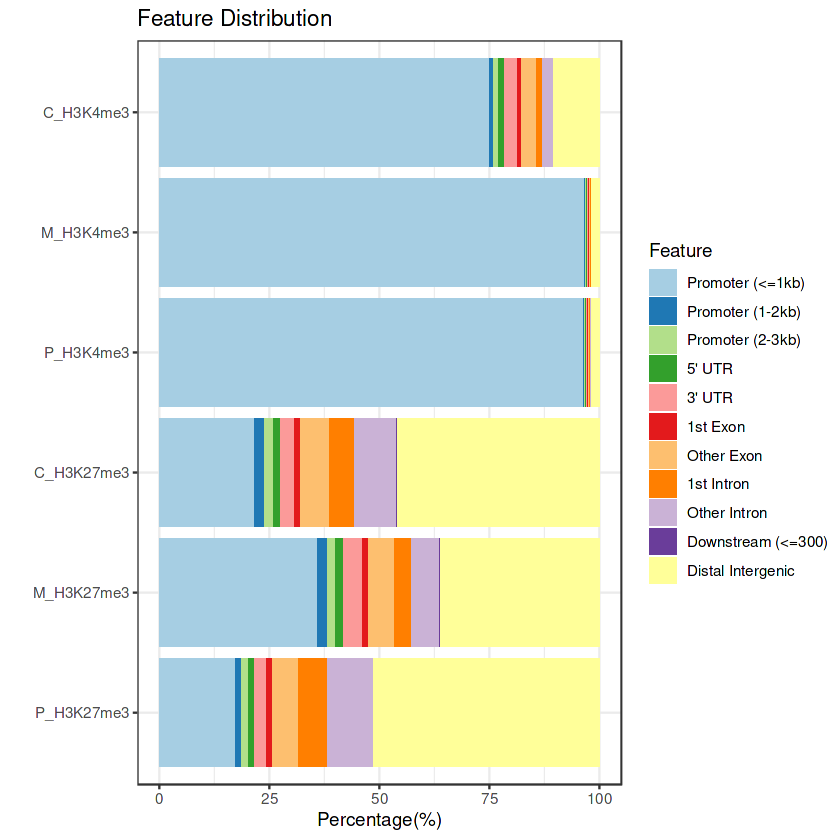

In [7]:
p = plotAnnoBar(peakAnnoList)
p

ggsave(filename = file.path(outPath, "peak_annotation.pdf"), p, width = 8, height = 6, units = "in", dpi = 300)
ggsave(filename = file.path(outPath, "peak_annotation.png"), p, width = 8, height = 6, units = "in", dpi = 300)




In [2]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggplot2_3.4.4                          
 [2] TxDb.Hsapiens.UCSC.hg19.knownGene_3.2.2
 [3] GenomicFeatures_1.50.4                 
 [4] AnnotationDbi_1.60.2                   
 [5] Biobase_2.52.0                         
 [6] GenomicRanges_1.50.2    